<a href="https://colab.research.google.com/github/mayayank95/HaN-Seg/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connection to google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Configurations

In [11]:
parent_dir = "drive/MyDrive/project/data/HaN-Seg/set_1/"

Impots

In [95]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

#**Patient data** 

### Read csv and order to convenient format

In [70]:
df_demographic = pd.read_csv(parent_dir+"patient_data.csv",header=None)
# preprocess to convenient format
df_demographic = df_demographic.iloc[:,0].str.split(';', expand=True)
# Set the first row as column names
df_demographic = df_demographic.set_axis(df_demographic.iloc[0], axis=1, copy=False)
# Remove the first row, as it is now the column names
df_demographic = df_demographic[1:]
df_demographic = df_demographic.set_index('Case')
df_demographic.sample(5)

,Gender (M/F),Age (years)
Case,,
case_18,M,69
case_39,M,74
case_19,F,42
case_09,M,67
case_35,M,76


### Basic statistics

In [71]:
print(f"number of patients: {df_demographic.shape[0]}")

number of patients:42


In [76]:
print(f"gender distribution:\n{np.round(df_demographic['Gender (M/F)'].value_counts()/df_demographic.shape[0],2)}")

gender distribution:
M    0.71
F    0.29
Name: Gender (M/F), dtype: float64


In [81]:
df_demographic.dtypes

0
Gender (M/F)    object
Age (years)     object
dtype: object

In [79]:
df_demographic.describe()

,Gender (M/F),Age (years)
count,42,42
unique,2,30
top,M,69
freq,30,4


### Numerical, and Categorical features



In [82]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, case_01 to case_42
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender (M/F)  42 non-null     object
 1   Age (years)   42 non-null     object
dtypes: object(2)
memory usage: 1008.0+ bytes


We can see that we don't have null for both features. There is one categorical attribute that needs to be encoded to a numeric value and one numeric attribute that needs to be converted to the integer type.

In [86]:
df_demographic['Age (years)'] = df_demographic['Age (years)'].astype(int)
label_encoder = LabelEncoder()
df_demographic['Gender (M/F)'] = label_encoder.fit_transform(df_demographic['Gender (M/F)'])

df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, case_01 to case_42
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Gender (M/F)  42 non-null     int64
 1   Age (years)   42 non-null     int64
dtypes: int64(2)
memory usage: 1008.0+ bytes


In [91]:
df_demographic['Age (years)'].describe()

count    42.000000
mean     59.952381
std      11.435828
min      36.000000
25%      51.250000
50%      61.000000
75%      69.000000
max      79.000000
Name: Age (years), dtype: float64

In [92]:
df_demographic['Gender (M/F)'].value_counts()

1    30
0    12
Name: Gender (M/F), dtype: int64

###  Data integrity

In [89]:
df_demographic.describe().loc[['min', 'max'], 'Age (years)']
# checking for illogical values

min    36.0
max    79.0
Name: Age (years), dtype: float64

We can see we don't have outliers.

### Visualizing data distributions

In [98]:
df_demographic.groupby('Gender (M/F)')['Age (years)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender (M/F),,,,,,,,
0,12.0,54.666667,11.586303,38.0,44.5,53.5,62.25,75.0
1,30.0,62.066667,10.853041,36.0,53.5,63.5,69.00,79.0


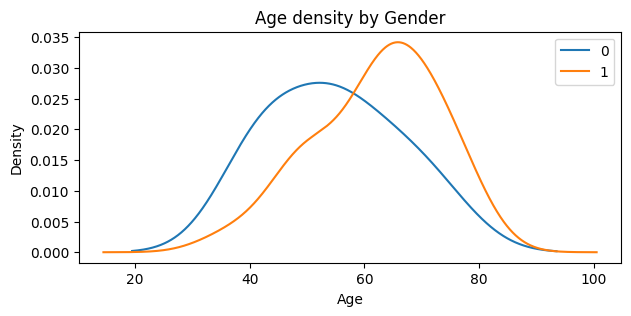

In [97]:
df_demographic.groupby('Gender (M/F)')['Age (years)'].plot(kind='kde', figsize=(7, 3))
plt.legend(loc = 'upper right')
plt.title('Age density by Gender')
plt.xlabel('Age')
plt.show()
#1 - M, 0-F

We can see that the average age of females is lower than the age of males.

# **Imaging data**

In [ ]:
pip install git+https://github.com/mhe/pynrrd.git
